In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [94]:
train_data=pd.read_excel(r"C:\Users\Ashwini\Documents\Data_Train.xlsx")

In [95]:
pd.set_option("display.max_columns",None)

In [96]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [97]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [99]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
40h 20m      1
27h 55m      1
42h 5m       1
27h 30m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [100]:
train_data.shape

(10683, 11)

In [101]:
# train_data.isnull().sum() [having only one missing values lets drop it]
train_data.dropna(inplace=True)

In [102]:
train_data.shape

(10682, 11)

# EDA

In [103]:
#train_data['day']=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day_name()
#train_data['month']=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month_name()

In [104]:
# from date_of_journey column we will extract the day of journy
# first convert  this column into datetime format
train_data["Journey_DAY"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

train_data["Journey_MONTH"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month


# we have only one year data dont do rr regarsing extraction of year from this column

# drop Date_of_journy apna matlab niakl liya
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [105]:
# Dep_Time is when a plan leaves the city to going to another city
# we will extract information like date_of-journey column
# extracting hours
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

# extracting minutes
train_data["Dep_minutes"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute


# lets drop DEp_Time
train_data.drop("Dep_Time",axis=1,inplace=True)

In [106]:
# Arrival_Time is when a plan reaches the destination city
# we will extract information like Dep_Time column
# extracting hours
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# extracting minutes
train_data["Arrival_minutes"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute


# lets drop Arrival_Time coulmn because iska koi kaam nahi raha ab
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [107]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [108]:
# Duration time is the time for travel
# so its  a difference between departure time and arrival time
train_data["Duration"].reset_index()

,index,Duration
0,0,2h 50m
1,1,7h 25m
2,2,19h
3,3,5h 25m
4,4,4h 45m
...,...,...
10677,10678,2h 30m
10678,10679,2h 35m
10679,10680,3h
10680,10681,2h 40m


In [109]:
"19h"+" 0m"

'19h 0m'

In [110]:
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

train_data["duration_hours"]=duration_hours
train_data["duration_minutes"]=duration_minutes

In [111]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [112]:
# lets drop the Duration column
train_data.drop("Duration",axis=1,inplace=True)

In [113]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [114]:
# 1 hour=60 minutes
# 1 minutes=1/60 hour
(50/60)+18

18.833333333333332

In [115]:
train_data["total_travel_time"]=np.round((train_data["duration_minutes"]/60)+ train_data["duration_hours"],2)

In [116]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_travel_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,2.83


# handle categorical featurees

1- Nominal Data= use onehot encoding because every value is eqal

2- Ordinal Data= use Lable encoding for labled data( when there is an order between values). you
use normal order encoding(1,2,3,4 by default order) or can use target lable encoding(give values
by your own choice

in airline column foreign flights can have more price if there is any but there is not so here use
ohe not lable encoding

In [117]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:ylabel='Airline'>

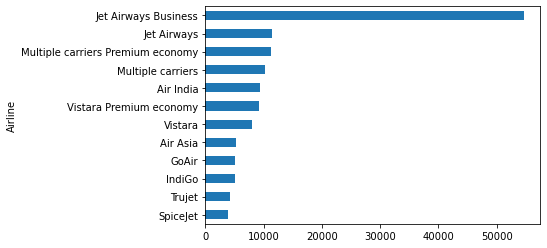

In [118]:
train_data.groupby('Airline')['Price'].median().sort_values().plot.barh()

<AxesSubplot:ylabel='Source'>

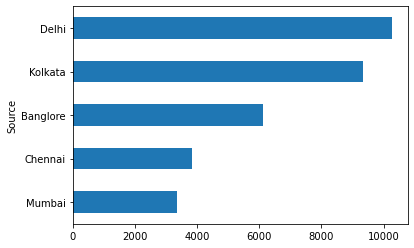

In [119]:
train_data.groupby('Source')['Price'].median().sort_values(ascending=True).plot.barh()

In [120]:
train_data.groupby('Destination')['Price'].median().sort_values(ascending=True).index

Index(['Hyderabad', 'Kolkata', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

<AxesSubplot:ylabel='Destination'>

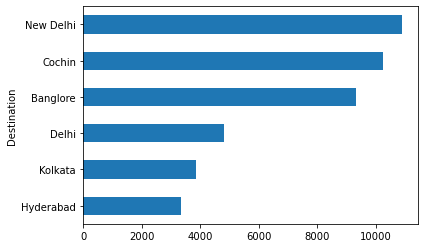

In [122]:
train_data.groupby('Destination')['Price'].median().sort_values().plot.barh()

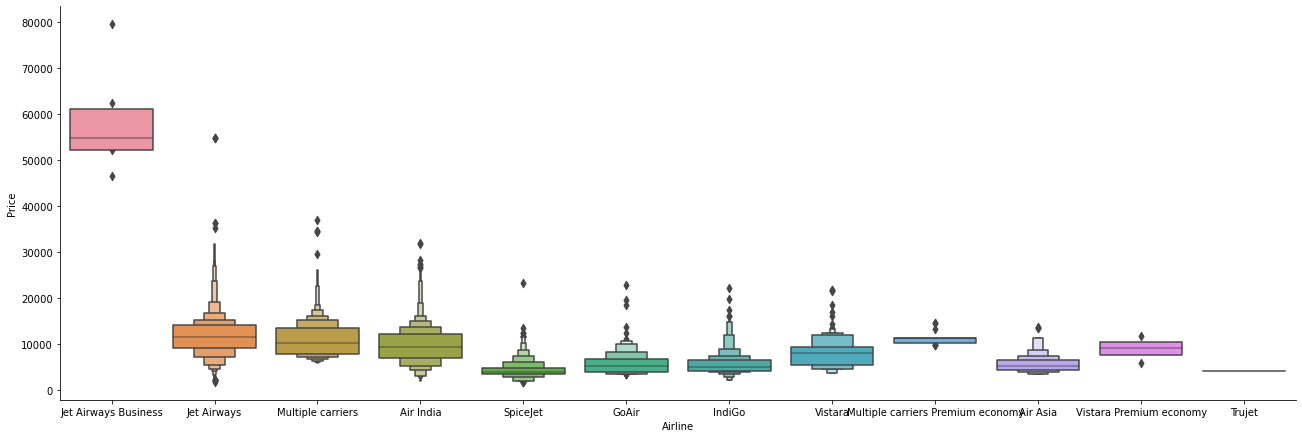

In [123]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [124]:
# lets apply onehot encoding upon Airline column
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [125]:
# lets do the same thing for source
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

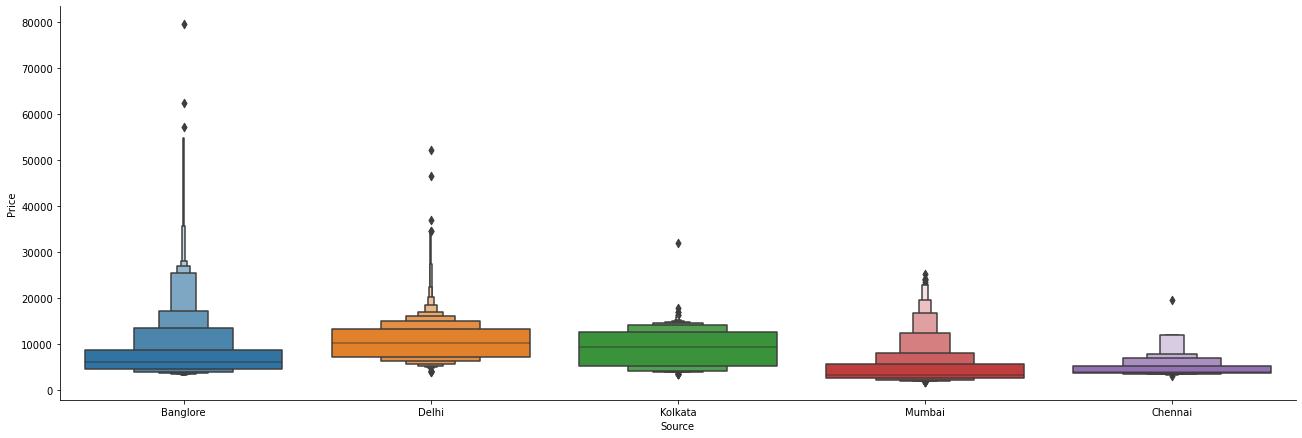

In [126]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [127]:
# lets apply onehot encoding upon Sorce column
sorce=train_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# you can improve your data by removing outliers

In [128]:
# do same for destination
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

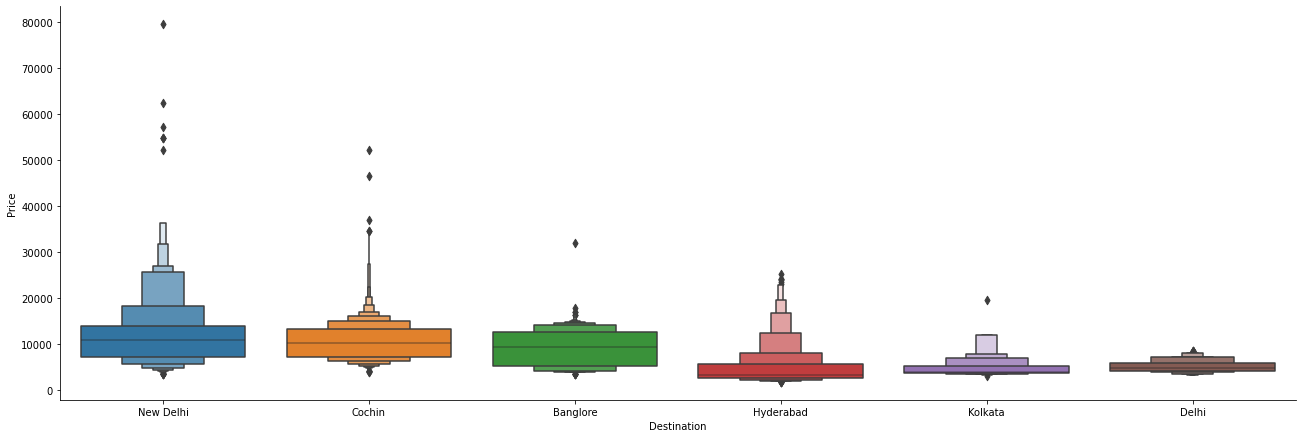

In [129]:
sns.catplot(y="Price",x="Destination",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [130]:
# lets apply onehot encoding upon Destination column
destination=train_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [131]:
train_data["Total_Stops"].value_counts().index

Index(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], dtype='object')

In [132]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [133]:
# Route and Total_stops are doing the same thing lets drop Rout
#Additional_Info is having no info in 80% columns ise b drop kr di do yr
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

# Lets handle total _stops

More stops MOre price(jyada lamba route hoga tbhi to rukna pdra h to more price or it may be ki
                      
jb jyada baar rukre h mtlb jyada stop h to kharcha b aaega jse fuel ka dekh lo jyada to b more stop more price)

<AxesSubplot:ylabel='Total_Stops'>

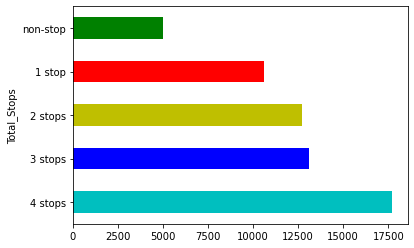

In [134]:
# LO g data n to khud hi kh diya
train_data.groupby("Total_Stops")["Price"].mean().sort_values(ascending=False).plot.barh(color=["c","b","y","r","g"])

In [135]:
# so we will do ordinal encoding for this column
train_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [136]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [137]:
# now concat all the datasets Airline+Soure+Destinartion
data_train=pd.concat([train_data,Airline,sorce,destination],axis=1)

In [138]:
data_train.drop(['Airline', 'Source', 'Destination'],axis=1,inplace=True)

In [139]:
data_train.shape

(10682, 30)

In [140]:
test_data=pd.read_excel(r"C:\Users\Ashwini\Documents\Test_set.xlsx")

In [141]:
test_data.shape

(2671, 10)

In [142]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


# Lets do all the steps for test data

In [143]:
# from date_of_journey column we will extract the day of journy
# first convert  this column into datetime format
test_data["Journey_DAY"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

test_data["Journey_MONTH"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month


# we have only one year data dont do rr regarsing extraction of year from this column

# drop Date_of_journy apna matlab niakl liya
test_data.drop("Date_of_Journey",axis=1,inplace=True)

In [144]:
# Dep_Time is when a plan leaves the city to going to another city
# we will extract information like date_of-journey column
# extracting hours
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour

# extracting minutes
test_data["Dep_minutes"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute


# lets drop DEp_Time
test_data.drop("Dep_Time",axis=1,inplace=True)

In [145]:
# Arrival_Time is when a plan reaches the destination city
# we will extract information like Dep_Time column
# extracting hours
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour

# extracting minutes
test_data["Arrival_minutes"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute


# lets drop Arrival_Time coulmn because iska koi kaam nahi raha ab
test_data.drop("Arrival_Time",axis=1,inplace=True)

In [146]:
duration1=list(test_data["Duration"])

In [147]:
len(duration1)

2671

In [148]:
for i in range(len(duration1)):
    if len(duration1[i].split())!=2:
        if "h" in duration1[i]:
            duration1[i]=duration1[i].strip() + " 0m"
        else:
            duration1[i]=  "0h "  + duration1[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration1)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

test_data["duration_hours"]=duration_hours
test_data["duration_minutes"]=duration_minutes

In [149]:
test_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,2,50


In [150]:
# lets apply onehot encoding upon Airline column
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

# lets apply onehot encoding upon Sorce column
sorce=test_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()

# lets apply onehot encoding upon Destination column
destination=test_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_DAY', 'Journey_MONTH', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'duration_hours',
       'duration_minutes'],
      dtype='object')

In [151]:
# so we will do ordinal encoding for this column
test_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [152]:
# encoding dataset maal rh gya thA bro
# now concat all the datasets Airline+Soure+Destinartion
data_test=pd.concat([test_data,Airline,sorce,destination],axis=1)

In [153]:
data_test.shape,data_train.shape

((2671, 33), (10682, 30))

In [154]:
data_train.total_travel_time.head(2)

0    2.83
1    7.42
Name: total_travel_time, dtype: float64

In [155]:
# i m removib=ng apna bnaya hua column jisme mne feature create kiya tha so sad
data_train.drop("total_travel_time",axis=1,inplace=True)

In [156]:
# aao faltu k column ek sath remove kare
data_test.drop(['Airline', 'Source', 'Destination','Route','Additional_Info','Duration'],axis=1,inplace=True)

In [157]:
data_test.shape

(2671, 27)

In [158]:
data_train.shape ,data_test.shape

((10682, 29), (2671, 27))

In [159]:
x=data_train.drop(["Airline_Trujet","Price"],axis=1)

In [160]:
x.head(1)

,Total_Stops,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
y=data_train["Price"]

In [162]:
y=np.array(y)

<AxesSubplot:>

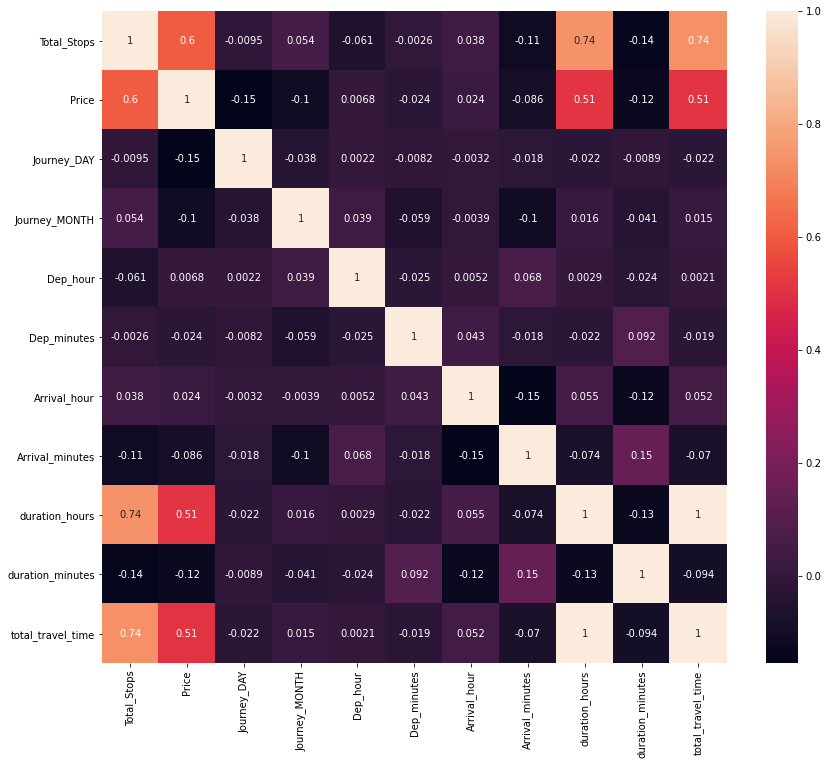

In [163]:
# find the correlation between dependent and independent feature
plt.figure(figsize=(14,12))
sns.heatmap(train_data.corr(),annot=True)

In [164]:
# important feature using extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

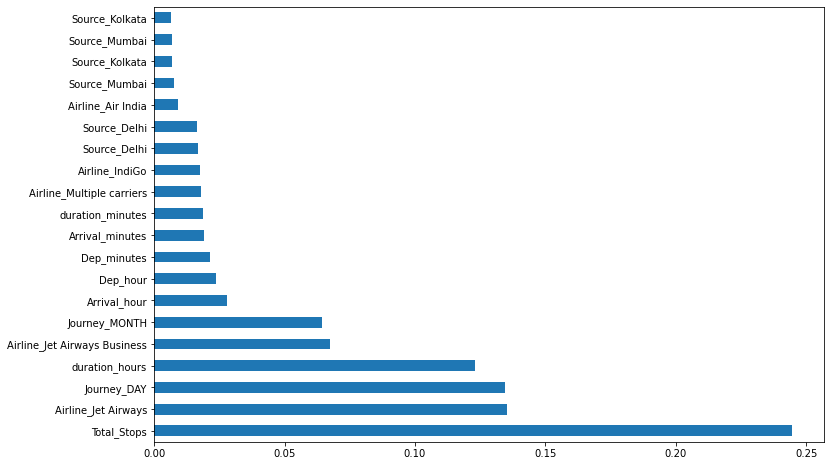

In [165]:
plt.figure(figsize=(12,8))
feature_imp=pd.Series(selection.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot.barh()
plt.show()

In [166]:
# fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [167]:
from sklearn.ensemble import RandomForestRegressor
rgf_rf=RandomForestRegressor()
rgf_rf.fit(X_train,y_train)

RandomForestRegressor()

In [168]:
y_pred=rgf_rf.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [171]:
rgf_rf.score(X_train,y_train)

0.9537692220762816

In [172]:
rgf_rf.score(X_test,y_test)

0.7908455116586657

<AxesSubplot:ylabel='Density'>

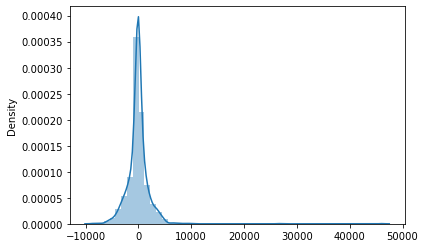

In [173]:
sns.distplot(y_test-y_pred)

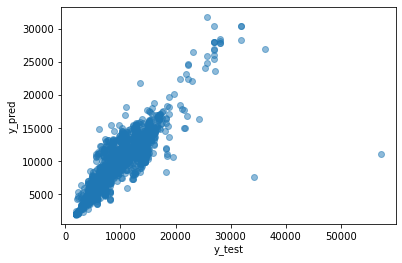

In [174]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [175]:
mean_absolute_error(y_test,y_pred)

1191.4191665503554

In [176]:
np.sqrt(mean_squared_error(y_test,y_pred))

2123.6291715050183

In [177]:
r2_score(y_test,y_pred)

0.7908455116586657

# hyperparametertuning most important

In [178]:
RandomForestRegressor()

RandomForestRegressor()

In [179]:
# Randomised search cv
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [180]:
# create the random grid
random_grid={
    "n_estimators":n_estimators,
     "max_features":max_features,
     "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [181]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

In [184]:
cross_val_score(rgf_rf,x,y)

array([0.82167152, 0.81022175, 0.84268139, 0.81683732, 0.76451062])

In [186]:
# Random search of parameters,using 5 fold cross validation
# search across 100 different combinations
rf_random=RandomizedSearchCV(estimator=rgf_rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [187]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [188]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [189]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [190]:
prediction=rf_random.predict(X_test)

In [191]:
r2_score(y_test,prediction)

0.8053685081132366

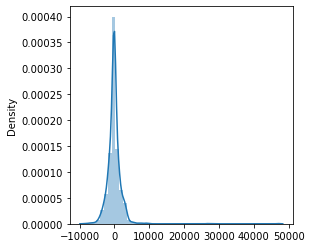

In [192]:
plt.figure(figsize=(4,4))
sns.distplot(y_test-prediction)
plt.show()

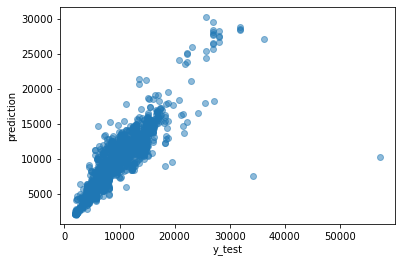

In [193]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [194]:
mean_absolute_error(y_test,prediction)

1165.9831102137632

# save the model

In [195]:
import pickle
file=open('Flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [196]:
model=open("Flight_rf.pkl",'rb')
forest=pickle.load(model)

In [197]:
y_prediction=forest.predict(X_test)

In [198]:
from sklearn.metrics import r2_score

In [199]:
r2_score(y_test,y_prediction)

0.8053685081132366